In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import random

%matplotlib inline 

### 1. Linear classifier with 3 wieghts

The classifier is of the form:

$ y = W.X = \begin{bmatrix}w_1\\ w_2 \\ w_3\end{bmatrix} . \begin{bmatrix}x_1\\ x_2 \\ 1\end{bmatrix}$

The error would be described as:

$ L = (y - \hat{y})^2$ where $\hat{y}$ is the correct label for the sample.

The gradient would be:

$\nabla_W L = 2(y-\hat{y}).X$

We then use Gradient descent to update the parameter $W$ as:

$W' = W - \eta \nabla_W L$

In [77]:
def forward_pass(W, X, Y):
    Y_n = np.dot(W, X.T)
    L = np.sum((Y - Y_n)**2)
    
    return Y_n, L


def training(W_init, X_train, Y_train, X_test, Y_test, eta):
    counter = 0
    convergence = True
    
    W = W_init.copy()
    
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
        
    Y, L = forward_pass(W, X_train, Y_train)
    _, L_test = forward_pass(W, X_test, Y_test)
    
    L_old = L
    delta_L = L_old
    
    errors = [(L, L_test)]
    print("Epoch {} - Train Error:{}, Test Error:{}".format(counter, L, L_test))
    
    while delta_L > 0.001:
        dL = np.dot(2 * (Y - Y_train), X_train)
        W -= eta * dL

        Y, L = forward_pass(W, X_train, Y_train)
        _, L_test = forward_pass(W, X_test, Y_test)

        delta_L = L_old - L
        L_old = L
        counter += 1
        
        
        errors.append((L, L_test))
        
        if delta_L < 0:
            convergence = False
            break
        
        if counter % 10 == 0:
            print("Epoch {} - Train Error:{}, Test Error:{}".format(counter, L, L_test))
    
    return convergence, errors, W

### 2. Generate data

Generate 2 dimensional data from two categories having equal probability with mean values as $\mu_1 = (-3, 4)^T$ and $\mu_2 = (4, -3)^T$. The covariance for both data samples are:

$\Sigma = \begin{bmatrix}16 & 0\\0 & 9\end{bmatrix}$


In [99]:
x_w1 = list(np.random.normal(-3, np.sqrt(16), 200))
y_w1 = list(np.random.normal(4, np.sqrt(9), 200))

x_w2 = list(np.random.normal(4, np.sqrt(16), 200))
y_w2 = list(np.random.normal(-3, np.sqrt(9), 200))

X_train = np.array([[x,y] for x,y in zip(x_w1 + x_w2, y_w1 + y_w2)])
Y_train = np.array([1]*200 + [-1]*200)

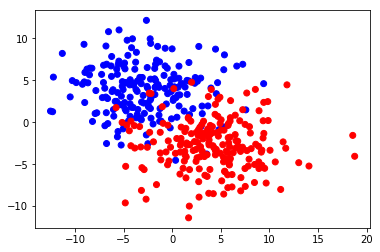

In [100]:
plt.scatter(X_train[:,0], X_train[:,1], color=['r' if x==-1 else 'b' for x in Y_train])
plt.show()

Generating test data with same parameters

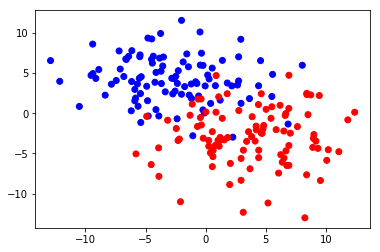

In [101]:
x_w1 = list(np.random.normal(-3, np.sqrt(16), 100))
y_w1 = list(np.random.normal(4, np.sqrt(9), 100))

x_w2 = list(np.random.normal(4, np.sqrt(16), 100))
y_w2 = list(np.random.normal(-3, np.sqrt(9), 100))

X_test = np.array([[x,y] for x,y in zip(x_w1 + x_w2, y_w1 + y_w2)])
Y_test = np.array([1]*100 + [-1]*100)

plt.scatter(X_test[:,0], X_test[:,1], color=['r' if x==-1 else 'b' for x in Y_test])
plt.show()

Initialising weights

In [87]:
W_init = np.random.randint(-20, 20, (1, 3))
W_init = W_init.astype(float)
W_init

array([[  5., -13., -18.]])

### 3. Trying different learning rates to find optimal value

In [88]:
eta = 1
c, errors, W = training(W_init, X_train, Y_train, X_test, Y_test, eta)

if c:
    print("\nParams: eta = {}".format(eta))
    print("Algorithm converges at:\n Training Error:{}, Testing Error:{} for W:{}").format(error[-1][0], error[-1][1], W)
    plt.plot([x[0] for x in errors], label="Training Error")
    plt.plot([x[1] for x in errors], label="Testing Error")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
else:
    print("\nParams: eta = {}".format(eta))
    print("Optimisation overshoots")

Epoch 0 - Train Error:2641131.3004340017, Test Error:1249275.2334190935

Params: eta = 1
Optimisation overshoots


In [89]:
eta = 1e-2
c, errors, W = training(W_init, X_train, Y_train, X_test, Y_test, eta)

if c:
    print("\nParams: eta = {}".format(eta))
    print("Algorithm converges at:\n Training Error:{}, Testing Error:{} for W:{}").format(error[-1][0], error[-1][1], W)
    plt.plot([x[0] for x in errors], label="Training Error")
    plt.plot([x[1] for x in errors], label="Testing Error")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
else:
    print("\nParams: eta = {}".format(eta))
    print("Optimisation overshoots")

Epoch 0 - Train Error:2641131.3004340017, Test Error:1249275.2334190935

Params: eta = 0.01
Optimisation overshoots


In [90]:
eta = 1e-3
c, errors, W = training(W_init, X_train, Y_train, X_test, Y_test, eta)

if c:
    print("\nParams: eta = {}".format(eta))
    print("Algorithm converges at:\n Training Error:{}, Testing Error:{} for W:{}").format(error[-1][0], error[-1][1], W)
    plt.plot([x[0] for x in errors], label="Training Error")
    plt.plot([x[1] for x in errors], label="Testing Error")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
else:
    print("\nParams: eta = {}".format(eta))
    print("Optimisation overshoots")

Epoch 0 - Train Error:2641131.3004340017, Test Error:1249275.2334190935

Params: eta = 0.001
Optimisation overshoots


In [91]:
eta = 1e-4
c, errors, W = training(W_init, X_train, Y_train, X_test, Y_test, eta)

if c:
    print("\nParams: eta = {}".format(eta))
    print("Algorithm converges at:\n Training Error:{}, Testing Error:{} for W:{}").format(error[-1][0], error[-1][1], W)
    plt.plot([x[0] for x in errors], label="Training Error")
    plt.plot([x[1] for x in errors], label="Testing Error")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
else:
    print("\nParams: eta = {}".format(eta))
    print("Optimisation overshoots")

Epoch 0 - Train Error:2641131.3004340017, Test Error:1249275.2334190935

Params: eta = 0.0001
Optimisation overshoots


Epoch 0 - Train Error:3711142.04259187, Test Error:1787142.7123411603
Epoch 10 - Train Error:150322.31193792686, Test Error:76894.9640874316
Epoch 20 - Train Error:21652.29449452027, Test Error:10715.137533160923
Epoch 30 - Train Error:5657.359021352628, Test Error:2725.7782162191115
Epoch 40 - Train Error:3302.8900561145324, Test Error:1621.7659949461208
Epoch 50 - Train Error:2665.3479596821544, Test Error:1332.23664539817
Epoch 60 - Train Error:2285.737715529238, Test Error:1150.139846089764
Epoch 70 - Train Error:1979.6625999781609, Test Error:997.4526689998074
Epoch 80 - Train Error:1718.8003273891925, Test Error:865.3431515433472
Epoch 90 - Train Error:1494.643762851484, Test Error:751.3007159504655
Epoch 100 - Train Error:1301.8034259801518, Test Error:653.1405588406254
Epoch 110 - Train Error:1135.876844829112, Test Error:568.7736740704861
Epoch 120 - Train Error:993.1044693620553, Test Error:496.3115541045215
Epoch 130 - Train Error:870.2548430227243, Test Error:434.0976301919

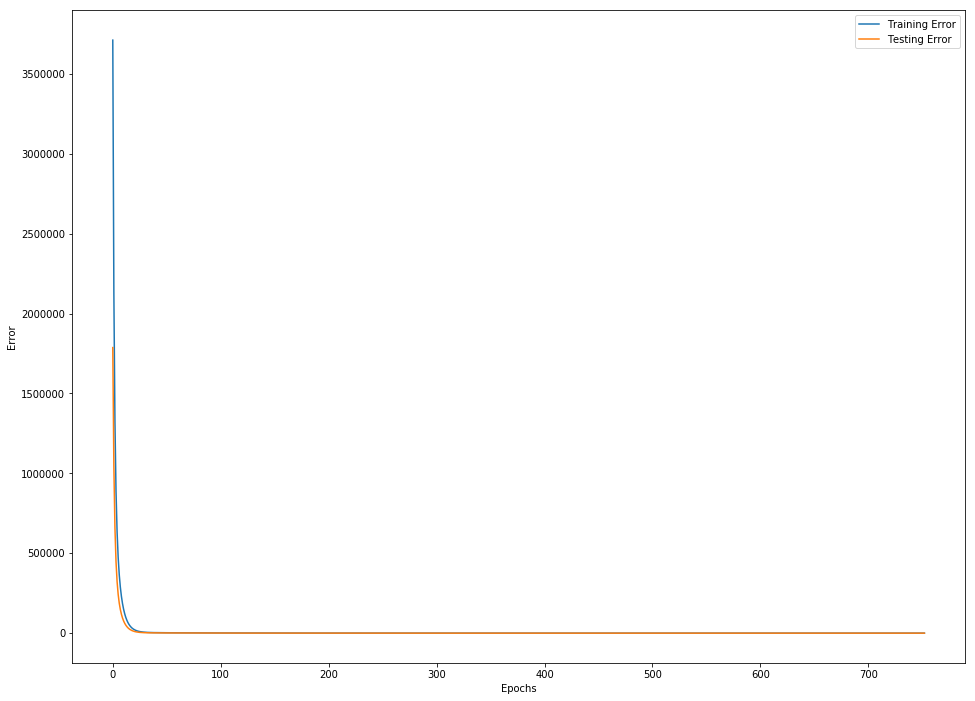

In [81]:
eta = 1e-5
c, errors, W = training(W_init, X_train, Y_train, X_test, Y_test, eta)

if c:
    print("\nParams: eta = {}".format(eta))
    print("Algorithm converges at:")
    print("Training Error:{}, Testing Error:{} for W:{}".format(errors[-1][0], errors[-1][1], W))
    fig = plt.figure(figsize=(16, 12))
    ax = fig.gca()
    ax.plot([x[0] for x in errors], label="Training Error")
    ax.plot([x[1] for x in errors], label="Testing Error")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
else:
    print("\nParams: eta = {}".format(eta))
    print("Optimisation overshoots")

Epoch 0 - Train Error:2641131.3004340017, Test Error:1249275.2334190935
Epoch 10 - Train Error:90084.45434565331, Test Error:45344.176609563656
Epoch 20 - Train Error:63199.467362254596, Test Error:32668.349516347746
Epoch 30 - Train Error:46728.430087414876, Test Error:24215.98312955081
Epoch 40 - Train Error:34586.75398394403, Test Error:17909.235827601336
Epoch 50 - Train Error:25607.873292658696, Test Error:13241.306874016265
Epoch 60 - Train Error:18967.577130248028, Test Error:9791.380709340134
Epoch 70 - Train Error:14056.768193828108, Test Error:7242.434772368017
Epoch 80 - Train Error:10424.995737557525, Test Error:5359.512959448819
Epoch 90 - Train Error:7739.130466192537, Test Error:3968.8514728550513
Epoch 100 - Train Error:5752.807715302516, Test Error:2941.9812351970227
Epoch 110 - Train Error:4283.829314647912, Test Error:2183.9291578433103
Epoch 120 - Train Error:3197.451211883467, Test Error:1624.489324171917
Epoch 130 - Train Error:2394.0238901201565, Test Error:1211.

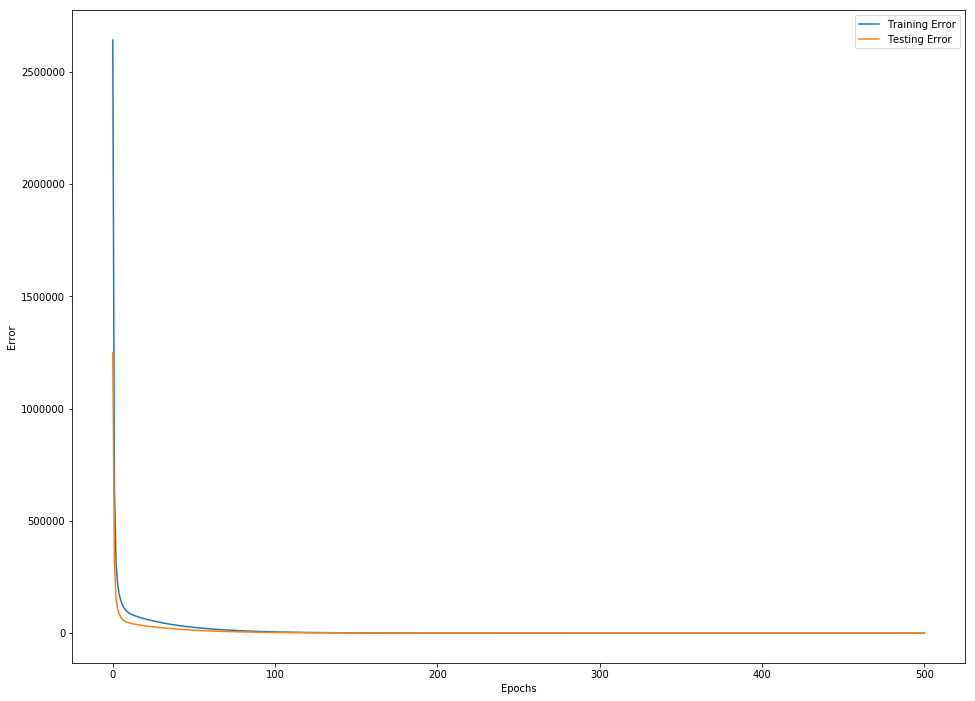

In [93]:
eta = 2e-5
c, errors, W = training(W_init, X_train, Y_train, X_test, Y_test, eta)

if c:
    print("\nParams: eta = {}".format(eta))
    print("Algorithm converges at:")
    print("Training Error:{}, Testing Error:{} for W:{}".format(errors[-1][0], errors[-1][1], W))
    fig = plt.figure(figsize=(16, 12))
    ax = fig.gca()
    ax.plot([x[0] for x in errors], label="Training Error")
    ax.plot([x[1] for x in errors], label="Testing Error")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
else:
    print("\nParams: eta = {}".format(eta))
    print("Optimisation overshoots")

Epoch 0 - Train Error:2641131.3004340017, Test Error:1249275.2334190935
Epoch 10 - Train Error:53919.4968030485, Test Error:28079.399005687606
Epoch 20 - Train Error:25167.597652827862, Test Error:13013.052784987365
Epoch 30 - Train Error:11794.892774888078, Test Error:6069.4733965468695
Epoch 40 - Train Error:5559.691534707502, Test Error:2842.246083603996
Epoch 50 - Train Error:2652.445635381163, Test Error:1344.397803376125
Epoch 60 - Train Error:1296.9033852302919, Test Error:650.7098677429716
Epoch 70 - Train Error:664.8636969569798, Test Error:330.4805417546435
Epoch 80 - Train Error:370.16674633949435, Test Error:183.3625662490261
Epoch 90 - Train Error:232.76035507235292, Test Error:116.264455925036
Epoch 100 - Train Error:168.69278897946356, Test Error:86.0016867348523
Epoch 110 - Train Error:138.82043015237957, Test Error:72.58954766385901
Epoch 120 - Train Error:124.89204366427317, Test Error:66.81276947991617
Epoch 130 - Train Error:118.39774733886303, Test Error:64.4448525

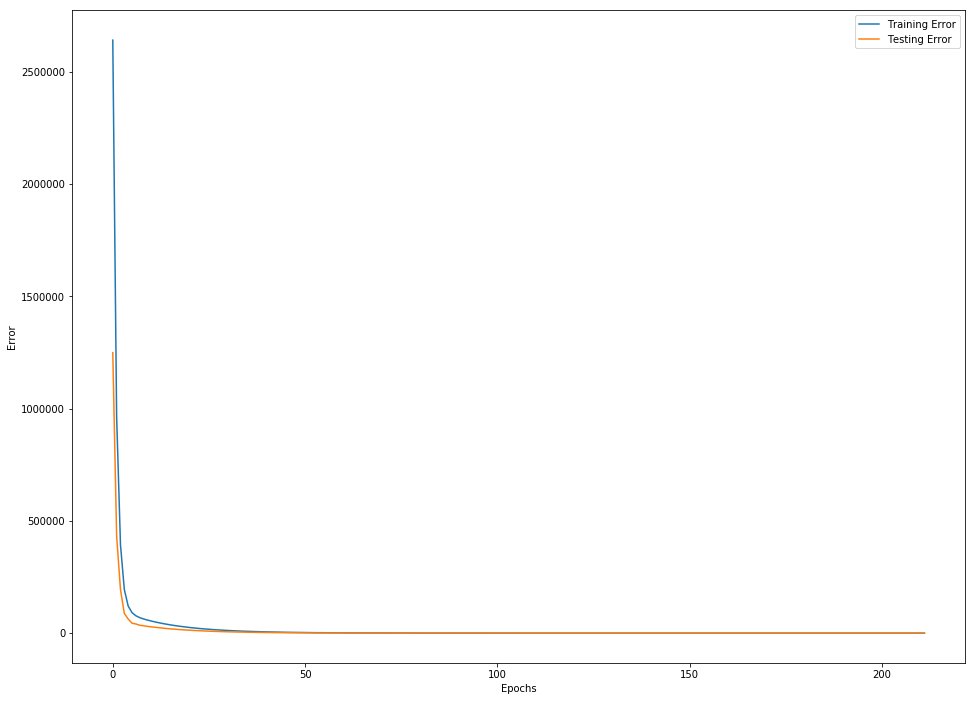

In [94]:
eta = 5e-5
c, errors, W = training(W_init, X_train, Y_train, X_test, Y_test, eta)

if c:
    print("\nParams: eta = {}".format(eta))
    print("Algorithm converges at:")
    print("Training Error:{}, Testing Error:{} for W:{}".format(errors[-1][0], errors[-1][1], W))
    fig = plt.figure(figsize=(16, 12))
    ax = fig.gca()
    ax.plot([x[0] for x in errors], label="Training Error")
    ax.plot([x[1] for x in errors], label="Testing Error")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
else:
    print("\nParams: eta = {}".format(eta))
    print("Optimisation overshoots")

In [95]:
eta = 7.5e-5
c, errors, W = training(W_init, X_train, Y_train, X_test, Y_test, eta)

if c:
    print("\nParams: eta = {}".format(eta))
    print("Algorithm converges at:")
    print("Training Error:{}, Testing Error:{} for W:{}".format(errors[-1][0], errors[-1][1], W))
    fig = plt.figure(figsize=(16, 12))
    ax = fig.gca()
    ax.plot([x[0] for x in errors], label="Training Error")
    ax.plot([x[1] for x in errors], label="Testing Error")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
else:
    print("\nParams: eta = {}".format(eta))
    print("Optimisation overshoots")

Epoch 0 - Train Error:2641131.3004340017, Test Error:1249275.2334190935

Params: eta = 7.5e-05
Optimisation overshoots


#### Therefore Optimal learning rate is found to be: $5 \times 10^{-5}$

### 4. Why is there no danger of overtraining?

There is no danger of overtraining since a linear classifier will always find the best fit when used with MSE.


### 5. Why do we always achieve minimum error?

Transformation of data with a linear classifier creates a convex set of data if the input set is also convex, since input belongs to real vectors, the output of the network also forms a convex set of numbers.

The MSE loss is a convex function, since input to the function is a convex set, the problem is a convex optimisation problem. Gradient descent on a convex optimisation problem always achieves global minima.


### 6. Preprocessing data

Subtract mean and divide by standard deviation for each dimension

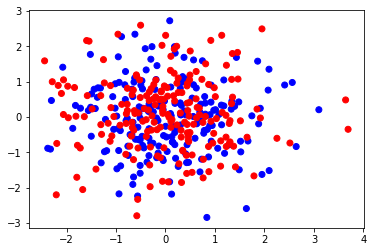

In [113]:
X_train_new = (X_train - np.array([[-3, 4]]*200 + [[4, -3]]*200)) / np.array([np.sqrt(16), np.sqrt(9)])

plt.scatter(X_train_new[:,0], X_train_new[:,1], color=['r' if x==-1 else 'b' for x in Y_train])
plt.show()

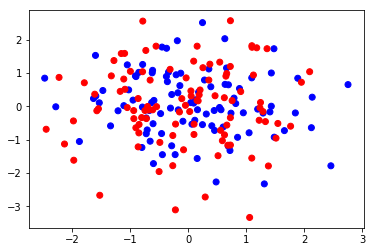

In [114]:
X_test_new = (X_test - np.array([[-3, 4]]*100 + [[4, -3]]*100)) / np.array([np.sqrt(16), np.sqrt(9)])

plt.scatter(X_test_new[:,0], X_test_new[:,1], color=['r' if x==-1 else 'b' for x in Y_test])
plt.show()

#### Finding optimal learning rate

In [122]:
eta = 1
c, errors, W = training(W_init, X_train_new, Y_train, X_test_new, Y_test, eta)

if c:
    print("\nParams: eta = {}".format(eta))
    print("Algorithm converges at:")
    print("Training Error:{}, Testing Error:{} for W:{}".format(errors[-1][0], errors[-1][1], W))
    fig = plt.figure(figsize=(16, 12))
    ax = fig.gca()
    ax.plot([x[0] for x in errors], label="Training Error")
    ax.plot([x[1] for x in errors], label="Testing Error")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
else:
    print("\nParams: eta = {}".format(eta))
    print("Optimisation overshoots")

Epoch 0 - Train Error:214016.23847317923, Test Error:114156.42823780456

Params: eta = 1
Optimisation overshoots


In [123]:
eta = 1e-2
c, errors, W = training(W_init, X_train_new, Y_train, X_test_new, Y_test, eta)

if c:
    print("\nParams: eta = {}".format(eta))
    print("Algorithm converges at:")
    print("Training Error:{}, Testing Error:{} for W:{}".format(errors[-1][0], errors[-1][1], W))
    fig = plt.figure(figsize=(16, 12))
    ax = fig.gca()
    ax.plot([x[0] for x in errors], label="Training Error")
    ax.plot([x[1] for x in errors], label="Testing Error")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
else:
    print("\nParams: eta = {}".format(eta))
    print("Optimisation overshoots")

Epoch 0 - Train Error:214016.23847317923, Test Error:114156.42823780456

Params: eta = 0.01
Optimisation overshoots


Epoch 0 - Train Error:214016.23847317923, Test Error:114156.42823780456

Params: eta = 0.001
Algorithm converges at:
Training Error:398.39246743046846, Testing Error:200.87004690740338 for W:[[ 0.0157161  -0.06068236  0.00147772]]


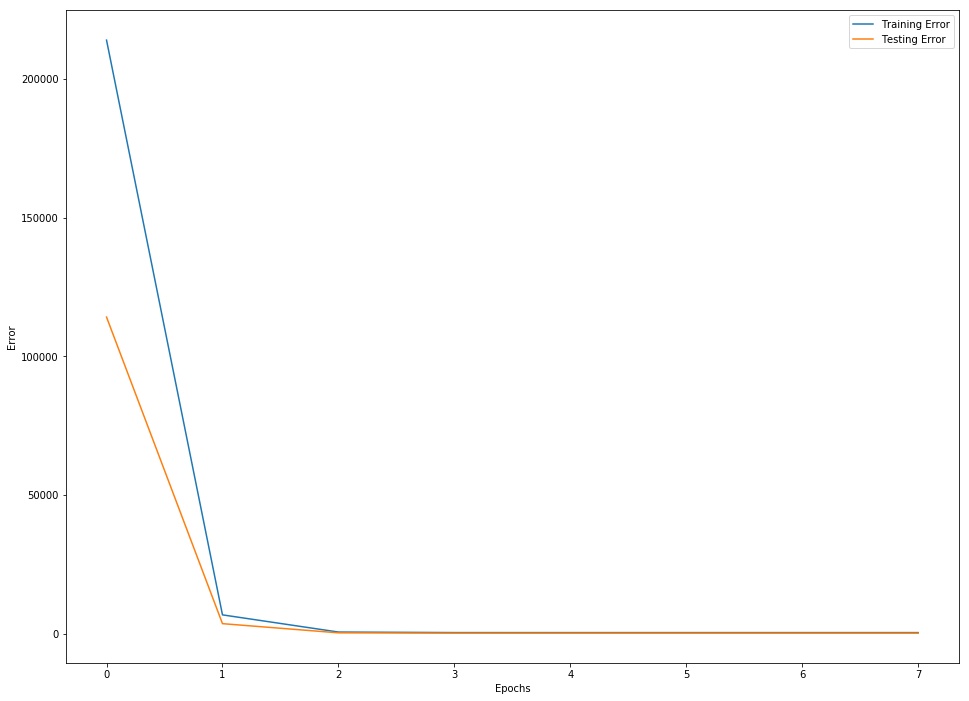

In [129]:
eta = 1e-3
c, errors, W = training(W_init, X_train_new, Y_train, X_test_new, Y_test, eta)

if c:
    print("\nParams: eta = {}".format(eta))
    print("Algorithm converges at:")
    print("Training Error:{}, Testing Error:{} for W:{}".format(errors[-1][0], errors[-1][1], W))
    fig = plt.figure(figsize=(16, 12))
    ax = fig.gca()
    ax.plot([x[0] for x in errors], label="Training Error")
    ax.plot([x[1] for x in errors], label="Testing Error")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
else:
    print("\nParams: eta = {}".format(eta))
    print("Optimisation overshoots")

Epoch 0 - Train Error:214016.23847317923, Test Error:114156.42823780456
Epoch 10 - Train Error:466.1809417649273, Test Error:243.86158927368425
Epoch 20 - Train Error:398.4369127257993, Test Error:200.9687715977003

Params: eta = 0.002
Algorithm converges at:
Training Error:398.39312852343505, Testing Error:200.87734000229852 for W:[[ 0.01672035 -0.06141416  0.00152578]]


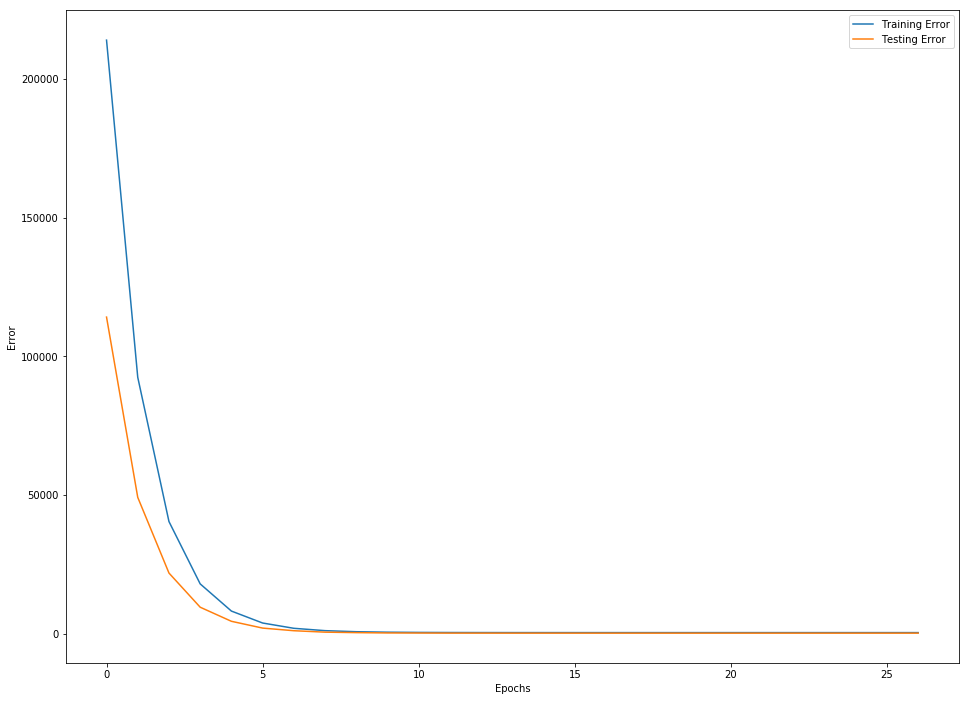

In [130]:
eta = 2e-3
c, errors, W = training(W_init, X_train_new, Y_train, X_test_new, Y_test, eta)

if c:
    print("\nParams: eta = {}".format(eta))
    print("Algorithm converges at:")
    print("Training Error:{}, Testing Error:{} for W:{}".format(errors[-1][0], errors[-1][1], W))
    fig = plt.figure(figsize=(16, 12))
    ax = fig.gca()
    ax.plot([x[0] for x in errors], label="Training Error")
    ax.plot([x[1] for x in errors], label="Testing Error")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
else:
    print("\nParams: eta = {}".format(eta))
    print("Optimisation overshoots")

In [131]:
eta = 5e-3
c, errors, W = training(W_init, X_train_new, Y_train, X_test_new, Y_test, eta)

if c:
    print("\nParams: eta = {}".format(eta))
    print("Algorithm converges at:")
    print("Training Error:{}, Testing Error:{} for W:{}".format(errors[-1][0], errors[-1][1], W))
    fig = plt.figure(figsize=(16, 12))
    ax = fig.gca()
    ax.plot([x[0] for x in errors], label="Training Error")
    ax.plot([x[1] for x in errors], label="Testing Error")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
else:
    print("\nParams: eta = {}".format(eta))
    print("Optimisation overshoots")

Epoch 0 - Train Error:214016.23847317923, Test Error:114156.42823780456

Params: eta = 0.005
Optimisation overshoots


### Optimal learning rate is now found to be much larger and convergence happens only in 7 epochs, therefore learning is faster.